## MNIST 데이터를 이용한 신경망 문제 풀이- 드롭아웃(Dropout)

### 01  MNIST 데이터 셋 설명
 * 0 ~ 9까지의 숫자를 28 X 28 픽셀 크기의 이미지로 구성.
 * 머신러닝계의 Hello World!
 * 기본 내장된 mnist 모듈을 이용하여 데이터를 로드

### 02 Dropout(드롭아웃) 설명
 * 과적합의 이해 - 학습한 결과가 학습 데이터에는 매우 잘 맞지만, 학습 데이터에만 너무 꼭 맞춰져 있어, 그 외의 데이터에는 잘 맞지 않음.
 * 학습시 전체 신경망 중 일부만을 사용하도록 하는 것.
 * 즉, 학습 단계마다 일부 뉴런을 제거(사용하지 않도록)함으로써, 일부 특징이 특정 뉴런에 고정되는 것을 막아 가중치의 균형을 잡도록 한다.
 * 학습 시 일부 뉴런을 학습시키지 않기 때문에 신경망이 충분히 학습되기까지의 시간은 조금 더 오래 걸리는 편이다.

<img src="../img/dropout1.png">

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

C:\Users\WITHJS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### 03 신경망 모델 구성
* 28 X 28 픽셀(X) -> 각각의 픽셀은 하나의 특징, 즉 784개의 특징
* Label(Y)은 0~9까지 숫자를 가르킴. 10개의 분류
* 입력 X, 출력 Y
* Palceholder를 이용하여 None에는 현재 데이터 개수를 모르기 때문에 None으로 둔다.

In [3]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

### keep_prob : dropout의 비율 지정(그래프 실행시)
* 값이 0.8일 경우, 뉴런의 사용비율이 80%을 말한다.
* 학습시에는 0.8을 넣어 드롭 아웃을 사용하고, 예측 시에는 1을 넣어, 신경망 전체를 사용한다. 

In [4]:
keep_prob = tf.placeholder(tf.float32)   # 학습시에는 0.8을 넣어 드롭 아웃을 사용, 예측 시에는 1을 넣어 신경망 전체를 사용.

### 우리가 만들 신경망
 * 784개의 특징(입력)
 * 256 (첫번째 은닉층의 뉴런 개수)
 * 256 (두번째 은닉층의 뉴런 개수)
 * 10 ( 결과값 0-9 분류 개수)
 * 각 뉴런 노드를 연결하는 가중치는 임의의 값으로 지정한다.
 * 활성화 함수는 ReLU함수를 이용한다.
 * tf.nn.dropout(L1, keep_prob)를 이용하여 dropout 수행

In [5]:
# 784개 입력, 256개의 뉴런 
# 표준편차가 0.01인 정규 분포를 가지는 임의의 뉴런을 초기화 시킨다.
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))

# X(입력값)에 가중치를 곱하고, 이후 ReLU 함수를 이용하여 레이어를 만든다.
L1 = tf.nn.relu(tf.matmul(X, W1))  # 데이터수 X 784 * 784 X 256 => 데이터수 X 256
L1 = tf.nn.dropout(L1, keep_prob)  # tf.nn.dropout()를 이용하여 DROPOUT 기법 적용이 가능하다.

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
# L1(입력값)에 가중치를 곱하고, 이후 ReLU 함수를 이용하여 레이어를 만든다.
L2 = tf.nn.relu(tf.matmul(L1, W2)) # 데이터수 X 256 * 256 X 256 => 데이터수 X 256
L2 = tf.nn.dropout(L2, keep_prob) 

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3) # 데이터수 X 256 * 256 X 10 => 데이터수 X 10

### 04. 손실함수(Loss) 및 최적화 알고리즘
* 손실(Loss) 함수 : Cross_entropy(크로스 엔트로피)
* tf.train.AdamOptimizer 함수 이용 최적화를 수행

In [6]:
cost = tf.reduce_mean(
          tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))  # 최신버전 변경 부분
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

### 신경망 모델 학습

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

### 05 그래프 실행

In [9]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [10]:
for epoch in range(30):
  total_cost = 0
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size) # 학습할 데이터를 가져온다.
    
    
    # 입력 X, 출력 Y에 각각의 데이터 넣고 실행
    _, cost_val = sess.run([optimizer,cost],
                          feed_dict={X:batch_xs, Y:batch_ys, keep_prob:0.8 })
    total_cost += cost_val
  print(batch_xs.shape, batch_ys.shape)
  print('Epoch {}, Avg. cost = {}'.format(epoch+1, total_cost/total_batch))
               

(100, 784) (100, 10)
Epoch 1, Avg. cost = 0.4306512485309081
(100, 784) (100, 10)
Epoch 2, Avg. cost = 0.1636396394466812
(100, 784) (100, 10)
Epoch 3, Avg. cost = 0.11403700510209257
(100, 784) (100, 10)
Epoch 4, Avg. cost = 0.088283805642277
(100, 784) (100, 10)
Epoch 5, Avg. cost = 0.07219575319269841
(100, 784) (100, 10)
Epoch 6, Avg. cost = 0.06005324552174319
(100, 784) (100, 10)
Epoch 7, Avg. cost = 0.05209486402909864
(100, 784) (100, 10)
Epoch 8, Avg. cost = 0.04282991985303604
(100, 784) (100, 10)
Epoch 9, Avg. cost = 0.041173020134976306
(100, 784) (100, 10)
Epoch 10, Avg. cost = 0.03681783202591098
(100, 784) (100, 10)
Epoch 11, Avg. cost = 0.03197445423998447
(100, 784) (100, 10)
Epoch 12, Avg. cost = 0.029796582701806486
(100, 784) (100, 10)
Epoch 13, Avg. cost = 0.030040724315807562
(100, 784) (100, 10)
Epoch 14, Avg. cost = 0.02651926356124353
(100, 784) (100, 10)
Epoch 15, Avg. cost = 0.026310068087292495
(100, 784) (100, 10)
Epoch 16, Avg. cost = 0.022918596905550325


### 06 학습 후, 결과 출력

In [11]:
# tf.argmax(model, 1)는 1번인덱스(두번째)값 중에서 최대값을 뽑기
# tf.argmax(Y,1)는 1번 인덱스(두번째)값 중에서 최대값 뽑기
# 결과는 10개 레이블중에 확률이 가장 높은 값이 된다.
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1)) 
is_correct
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [12]:
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(10000, 784)
(10000, 10)


* 예측시에는 keep_prob를 1로 지정하여 전체 뉴런을 사용함.
* 정확도가 0.9799에서 0.9839로 향상됨.

In [13]:
print('정확도', sess.run(accuracy, feed_dict={X:mnist.test.images,
                                              Y:mnist.test.labels,
                                          keep_prob:1}))

정확도 0.9839


In [14]:
import matplotlib.pyplot as plt

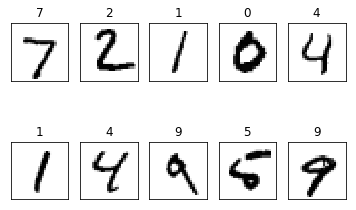

In [15]:
#########
# 결과 확인 (matplot)
######
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

### 더 알아보기
* 과적합을 막아주는 기법으로 가장 유명한 것이 쉽게 이해 가능한 것은 드롭아웃이다.
* 최근에는 배치 정규화(Batch Normalization)라는 기법이 많이 이용됨.
* 과적합을 막고, 학습 속도도 향상시켜주는 장점이 있다.
* 등장 배경은 학습 시 발산이나 소실 등을 방지하여 학습 속도를 높이기 위한 방법이다.
* tf.nn.batch_normalization과 tf.layers.batch_normalization 함수로 쉽게 적용 가능.